# ASSIGNMENT- ADVANCED REGRESSION
                                     

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### OBJECTIVES:
    1. Which variables are significant in predicting the price of a house.
    2. How well those variables describe the price of a house
    3. Determine the optimal value of lambda for ridge and lasso regression.

#### IMPORTING THE REQUIRED LIBRARIES :

In [1]:
#importing pandas as numpy libraries.
import numpy as np
import pandas as pd

# importing libraries for visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

#to make a copy of the original dataset.
import copy

#to get the complete data.
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

#preventing warnings if any
import warnings
warnings.filterwarnings('ignore')

#### LOADING AND READING THE DATA SET :

In [2]:
house = pd.read_csv(r"C:\Users\ADMIN\Desktop\train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### BASIC SANITY CHECK ON THE DATA:

In [3]:
house.shape 

(1460, 81)

In [4]:
print("No.of rows:",house.shape[0] )
print("No.of columns:",house.shape[1] )


No.of rows: 1460
No.of columns: 81


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#summary of the data:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### HANDLING MISSING VALUES:

In [7]:
missing = round((house.isnull().mean())*100,2).sort_values(ascending=False)
missing

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

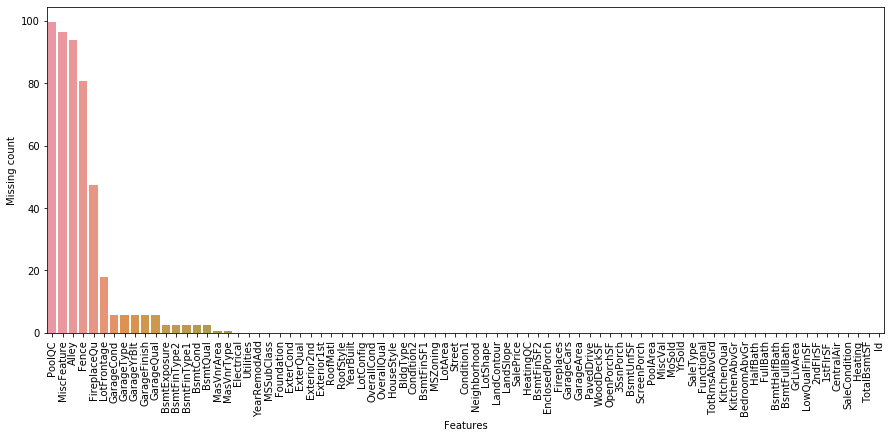

In [8]:
#plotting the missing values:
plt.figure(figsize=(15,6))

plt.xticks(rotation='90')

sns.barplot(x=missing.index, y = missing)

plt.xlabel('Features')

plt.ylabel('Missing count')

plt.show()

### We can see that there are high missing values in the PoolQC, MiscFeature, Alley, Fence,etc. So checking the null values in the data if those are Actually null or they depict some meaning.

In [9]:
#Missing values more than 50%

miss_50 = house[missing[missing > 50].index]
miss_50.head()


,PoolQC,MiscFeature,Alley,Fence
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


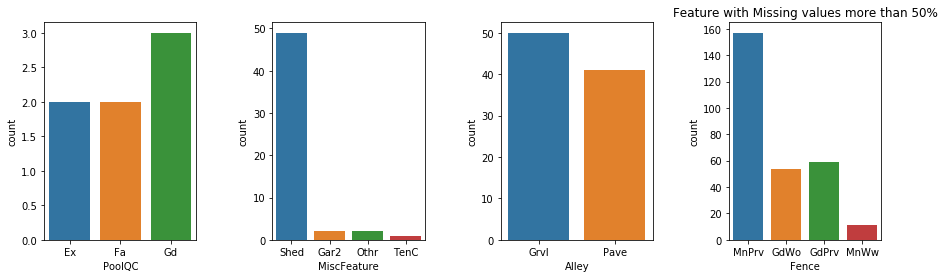

In [10]:
#plotting columns with missing value more than 50%:

plt.figure(figsize = (15,4))

c = 1

for i in miss_50.columns:
    plt.subplot(1,4,c)
    sns.countplot(x=i,data = house)
    c += 1 
    
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

plt.title('Feature with Missing values more than 50%')

plt.show()

In [11]:
#checking the unique categories in each of these columns: 

print(house['PoolQC'].unique()) 

print(house['Alley'].unique()) 

print(house['Fence'].unique())

print(house['MiscFeature'].unique())


[nan 'Ex' 'Fa' 'Gd']
[nan 'Grvl' 'Pave']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


#### From the data description:
    NA in PoolQC depicts No Pool .Hence we can impute these NA values with new value as 'No Pool'.
    NA in Alley depicts No Alley acess. Hence we can impute these NA values with new value as 'No Alley'
    NA in Fence depicts No fence. Hence we can impute these NA values with new value as 'No Fence'
    NA in MiscFeature depicts None. Hence we can impute these NA values with new value as 'None'

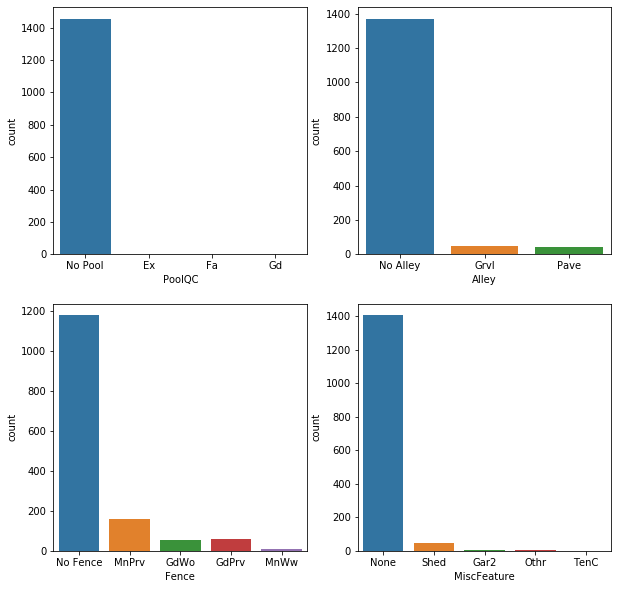

In [12]:
#Plotting some countplots after replacing the Meaningful Nan values with some Meaning: 

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
house['PoolQC'] = house['PoolQC'].fillna('No Pool')
sns.countplot(x = 'PoolQC', data = house)

plt.subplot(2,2,2)
house['Alley'] = house['Alley'].fillna('No Alley')
sns.countplot(x = 'Alley', data = house)

plt.subplot(2,2,3)
house['Fence'] = house['Fence'].fillna('No Fence')
sns.countplot(x = 'Fence', data = house)

plt.subplot(2,2,4)
house['MiscFeature'] = house['MiscFeature'].fillna('None')
sns.countplot(x ='MiscFeature', data = house)


plt.show()

In [13]:
#checking the missing values again.

missing1 = round((house.isnull().mean())*100,2).sort_values(ascending=False)
missing1.head(15)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageCond       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [14]:
#Checking columns with more than 10% missing values:

miss_10 = house[missing1[missing1 > 10].index]
miss_10.head()

,FireplaceQu,LotFrontage
0,NaN,65.0
1,TA,80.0
2,TA,68.0
3,Gd,60.0
4,TA,84.0


In [15]:
house['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

### From the data description , we can see that 'NAn' means 'No Fireplace' in FireplaceQu column. Hence replacing the NA values with 'No Fireplace'

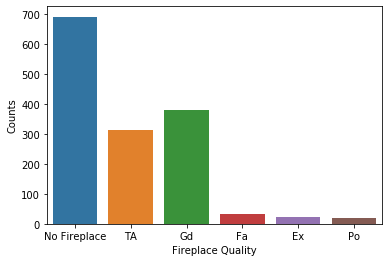

In [16]:
#Plotting the countplot after replacing the Nan values:

house['FireplaceQu'] = house['FireplaceQu'].fillna('No Fireplace')

sns.countplot(x = 'FireplaceQu', data = house)

plt.xlabel('Fireplace Quality') 

plt.ylabel('Counts') 

plt.show()

Text(0.5, 1.0, 'Linear feet of street connected to property')

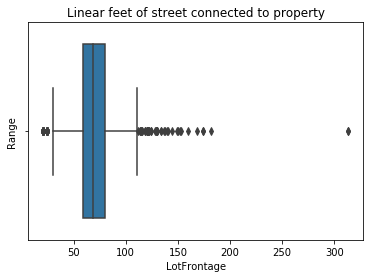

In [17]:
#Box plot for LotFrontage:
sns.boxplot(x='LotFrontage', data = house) 

plt.xlabel('LotFrontage')

plt.ylabel('Range')

plt.title('Linear feet of street connected to property')

### From the above box plot, we can see that there are some outliers in the 'LotFrontage' column. Hence imputing the missing values with its Median will be a better choice.


In [18]:
house['LotFrontage'] = house['LotFrontage'].fillna((house['LotFrontage'].median()))


In [19]:
#checking missing values again: 

missing2 = round((house.isnull().mean())*100,2).sort_values(ascending = False)

missing2.head(15)

GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
Alley           0.00
RoofStyle       0.00
dtype: float64

In [20]:
# Columns with missing values more tha 5%:

miss_5 = house[missing2[missing2 >= 5].index]
miss_5.head()


,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual
0,2003.0,TA,Attchd,RFn,TA
1,1976.0,TA,Attchd,RFn,TA
2,2001.0,TA,Attchd,RFn,TA
3,1998.0,TA,Detchd,Unf,TA
4,2000.0,TA,Attchd,RFn,TA


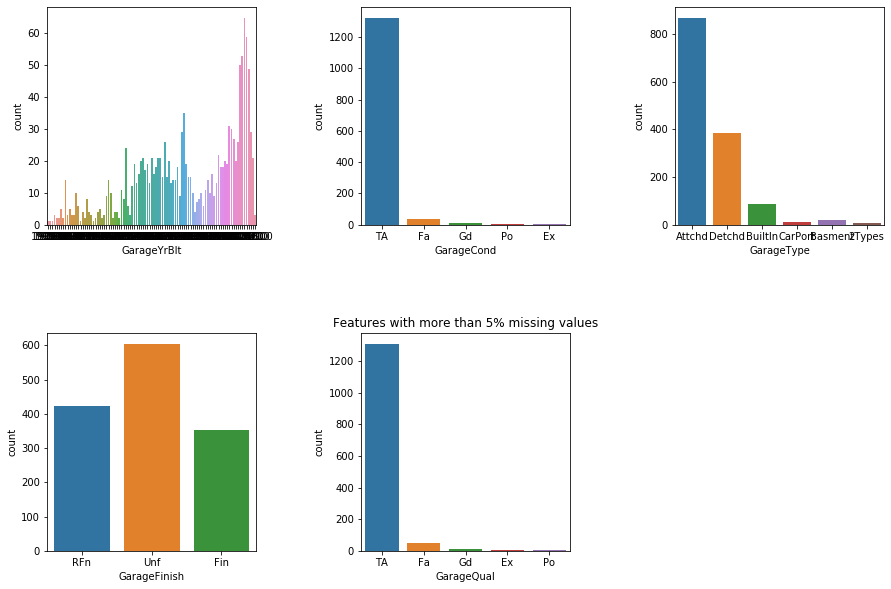

In [21]:
# bar plots for column with missing value more than 5%:
plt.figure(figsize = (15,10))
c = 1
for i in miss_5.columns:
    plt.subplot(2,3,c)
    sns.countplot(x = i, data = house ) # countplot for each feature
    c += 1 
    
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

plt.title('Features with more than 5% missing values')

plt.show()

### From the data description:
    - In GarageCond column, NA means  No Garage
    - In GarageType column, NA means No Garage
    - In GarageFinish column, NA means No Garage
    - In GarageQual column, NA means  No Garage
### Hence, we can replace the NA values with 'No Garage' in all these 4 columns.


In [22]:

cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] #Garage columns.
for x in cols:
    house[x] = house[x].fillna('No Garage') # replacing Nan with 'No Garage'


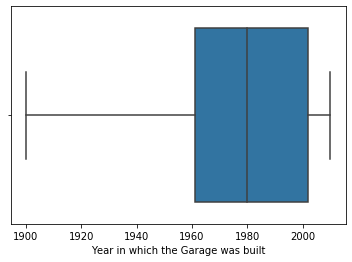

In [23]:
#plotting a boxplot to check the spread of year data:

sns.boxplot(x = 'GarageYrBlt',data = house)

plt.xlabel('Year in which the Garage was built')

plt.show()

In [24]:
#creating the new column as Garage Age from the GarageYrBlt column.

house['Garage Age'] = house['GarageYrBlt'].max()-house['GarageYrBlt']

In [25]:
# Lets drop the original GarageYrBlt column.

house = house.drop(['GarageYrBlt'],axis='columns')
house.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [26]:
round((house['Garage Age'].isnull().mean())*100,2) # missing value in Garage Age column.

5.55

### Here the NA in Garage Type means no Garage, hence the Year in which the garage was built will be Null, hence imputing  missing values in the Garage Age with 0. 

In [27]:
house['Garage Age'] = house['Garage Age'].fillna(0)

In [28]:
#checking the remaining missing values.

missing3 = round((house.isnull().mean())*100,2).sort_values(ascending = False)
missing3.head(15)

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtFinType1    2.53
BsmtCond        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
ExterQual       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
Garage Age      0.00
ExterCond       0.00
Foundation      0.00
dtype: float64

In [29]:
#checking the unique values in the Missing columns:

print(house['BsmtFinType2'].unique())

print(house['BsmtExposure'].unique())

print(house['BsmtQual'].unique())

print(house['BsmtFinType1'].unique())

print(house['BsmtCond'].unique())

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['No' 'Gd' 'Mn' 'Av' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['TA' 'Gd' nan 'Fa' 'Po']


### From the Data description:
    In all these columns :
        BsmtFinType2, BsmtExposure, BsmtQual,  BsmtFinType1, BsmtCond, NA meand No Basement. 
    Hence imputing the Nan values with 'No Basement' as a category.



In [30]:
#replacing null values in these columns with 'No Basement' :

cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtQual',  'BsmtFinType1', 'BsmtCond']
for x in cols:
    house[x] = house[x].fillna('No Basement')


In [31]:
house['MasVnrType'].unique() # unqiue values 

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

### Imputing null values in 'MasVnrType' with its mode value 'None'


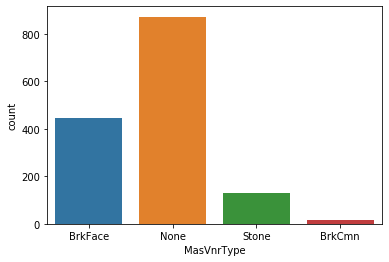

In [32]:
house['MasVnrType'] = house['MasVnrType'].fillna('None')

sns.countplot(x = 'MasVnrType', data = house) # countplot for 'MasVnrType'

Text(0.5, 1.0, 'Masonry veneer area')

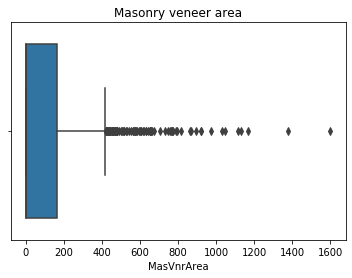

In [33]:
#Box plot for MasVnrArea :

sns.boxplot(x = 'MasVnrArea',data = house)

plt.title('Masonry veneer area')

### Imputing null values in 'MasVnrArea' with its median as it contains some outliers. 

In [34]:
house['MasVnrArea'] = house['MasVnrArea'].fillna((house['MasVnrArea'].median()))


### Imputing null values in 'Electrical' with its mode value.


In [35]:
house['Electrical'].mode() #mode of 'Electrical' column

0    SBrkr
dtype: object

In [36]:
#imputing with mode value:
house['Electrical'] = house['Electrical'].fillna('SBrkr')


In [37]:
#Checking the missing values if any:

round((house.isnull().mean())*100,2).sort_values(ascending=False)


Garage Age       0.0
Heating          0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
HeatingQC        0.0
SalePrice        0.0
CentralAir       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

### Now there are no missing values and the data is clean. Lets analyse some more columns:


In [38]:
#Converting the Year columns to no of years:

house['Sold Age'] = house['YrSold'].max()-house['YrSold']

house['Build Age'] = house['YearBuilt'].max()-house['YearBuilt']

house['Remodel Age'] = house['YearRemodAdd'].max()-house['YearRemodAdd']

In [39]:
#Dropping the original Year columns:

house = house.drop(['YrSold'],axis = 'columns')
house = house.drop(['YearBuilt'],axis = 'columns')
house = house.drop(['YearRemodAdd'],axis = 'columns')

In [40]:
#Dropping ID column as it will be of no use for modelling.

house = house.drop(['Id'],axis='columns')

In [41]:
#checking the counts of each feature in the data:
house.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBa

In [42]:
#features with datatype as object:

house.dtypes == 'object'

MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
Alley             True
LotShape          True
LandContour       True
Utilities         True
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2        True
BldgType          True
HouseStyle        True
OverallQual      False
OverallCond      False
RoofStyle         True
RoofMatl          True
Exterior1st       True
Exterior2nd       True
MasVnrType        True
MasVnrArea       False
ExterQual         True
ExterCond         True
Foundation        True
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating           True
HeatingQC         True
CentralAir        True
Electrical        True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea  

In [43]:
#checking the value counts of some variables:

print(house['MSSubClass'].value_counts())

print(house['OverallQual'].value_counts())

print(house['OverallCond'].value_counts())

print(house['GarageCars'].value_counts())


print(house['MoSold'].value_counts())

print(house['Sold Age'].value_counts())

print(house['BsmtFullBath'].value_counts())

print(house['BsmtHalfBath'].value_counts())

print(house['FullBath'].value_counts())

print(house['HalfBath'].value_counts())

print(house['BedroomAbvGr'].value_counts())

print(house['KitchenAbvGr'].value_counts())

print(house['TotRmsAbvGrd'].value_counts())

print(house['Fireplaces'].value_counts())


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
1    338
3    329
4    314
2    304
0    175
Name: Sold Age, dtype: int64
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
0    913
1    535
2     12
Name: HalfBath, dtype: int64
3    804


### We can see that these features are actually categorical , hence we need to change the datatypes of these features from int / float to 'object'

In [44]:
#changing the data type of such columns as 'Object'


cat_cols=['MSSubClass','OverallQual','OverallCond','GarageCars','MoSold','Sold Age','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces']


for i in cat_cols:
    house[i] = house[i].astype('object')


In [45]:
#checking all the columns with less than or equal to 2 unique values: 

for x in house.select_dtypes([object]).columns:
    if house[x].nunique() <= 2:
        print(house[x].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


### We can see that, Utilities and Street is not conveying any variance in the data. Hence we can drop this feature.

In [46]:
house = house.drop(['Utilities'],axis='columns')
house = house.drop(['Street'],axis='columns')

##### checking all the columns with more than 2 unique values: 

In [47]:
for x in house.select_dtypes([object]).columns:
    if house[x].nunique() > 2:
        print(house[x].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmn

#### GROUPING SOME CATEGORIES WITH LOW FREQUENCY INTO 1 CATEGORY:

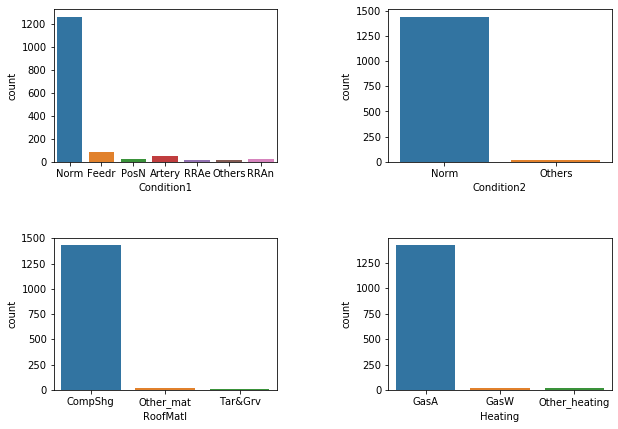

In [48]:
#Combined the less frequncy conditions into single category 'Others'

plt.figure(figsize=(10,7))

house['Condition1'] = house['Condition1'].replace(['PosA', 'RRNn', 'RRNe' ] , 'Others') 
plt.subplot(2,2,1) #subplot 1
sns.countplot(x='Condition1',data=house) #plotting a countplot of all the categories.


house['Condition2'] = house['Condition2'].replace(['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'] , 'Others')
plt.subplot(2,2,2) #subplot 2
sns.countplot(x='Condition2',data=house)  #plotting a countplot of all the categories.

house['RoofMatl'] = house['RoofMatl'].replace(['Membran','ClyTile','Roll','Metal','WdShngl','WdShake'] , 'Other_mat')
plt.subplot(2,2,3) #subplot 3
sns.countplot(x='RoofMatl',data=house)

house['Heating'] = house['Heating'].replace(['Wall','OthW', 'Floor','Grav'] , 'Other_heating')
plt.subplot(2,2,4) #subplot 4
sns.countplot(x='Heating',data=house)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

plt.show()


#### INSIGHTS:
    1. We can see that most of the houses have Normal conditions. This could be a better feature for price prediction of the house. 
    2. Also Composite type of Root material and Gas forced warm air furnace is used in most of the houses.




##### Continuing the same for some more variables:

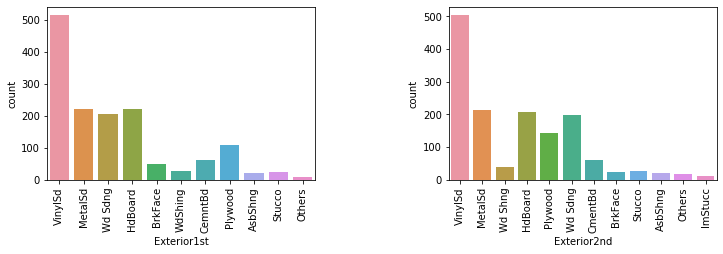

In [49]:
plt.figure(figsize=(12,7)) 


house['Exterior1st'] = house['Exterior1st'].replace(['Stone','BrkComm','AsphShn','CBlock','ImStucc'] , 'Others')
plt.subplot(2,2,1) #subplot 1
sns.countplot(x='Exterior1st',data=house)
plt.xticks(rotation='90')


house['Exterior2nd'] = house['Exterior2nd'].replace(['Brk Cmn','Stone','AsphShn','CBlock','Other'] , 'Others')
plt.subplot(2,2,2) #subplot 2
sns.countplot(x='Exterior2nd',data=house)
plt.xticks(rotation='90')

plt.subplots_adjust(wspace=0.5)

plt.show()



#### INSIGHTS: 
    1. Vinyl Siding is used as exterior covering for most of the houses.

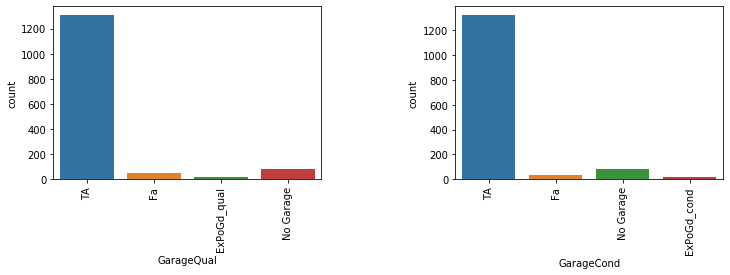

In [50]:
plt.figure(figsize=(12,7))

house['GarageQual'] = house['GarageQual'].replace(['Ex','Po','Gd'] , 'ExPoGd_qual')
plt.subplot(2,2,1) #subplot 1
sns.countplot(x='GarageQual',data=house)
plt.xticks(rotation='90')

house['GarageCond'] = house['GarageCond'].replace(['Gd','Ex','Po'] , 'ExPoGd_cond')
plt.subplot(2,2,2) #subplot 2
sns.countplot(x='GarageCond',data=house)
plt.xticks(rotation='90')

plt.subplots_adjust(wspace=0.5)

plt.show()




#### INSIGHTS:
    1. MOST OF THE HOUSES HAVE AVERAGE GARAGE QUALITY AND CONDITION.THIS COULD BE FEATURE WHICH CAN BE INCREASE THE SALES PRICE.



#### Grouping the Sale types with less frequency into one Category named 'Other sale'

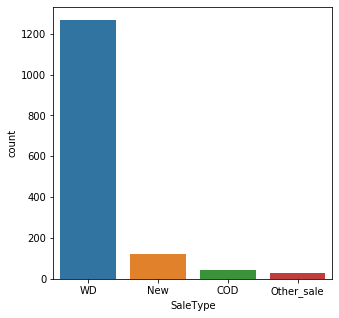

In [51]:
plt.figure(figsize=(5,5))
house['SaleType'] = house['SaleType'].replace(['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'  ] , 'Other_sale')
sns.countplot(x='SaleType',data=house)

In [52]:
#Grouping the fireplaces with less frequency into one Category named 'Others'

house['Fireplaces'] = house['Fireplaces'].replace([12,14,2] , 'Others')
print(house['Fireplaces'].value_counts())

house['Functional'] = house['Functional'].replace(['Maj2','Sev'   ] , 'Other_func')
print(house['Functional'].value_counts())

0         690
1         650
Others    115
3           5
Name: Fireplaces, dtype: int64
Typ           1360
Min2            34
Min1            31
Mod             15
Maj1            14
Other_func       6
Name: Functional, dtype: int64


In [53]:
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].replace([12,14,2  ] , 'Other_totrm')
print(house['TotRmsAbvGrd'].value_counts())

house['KitchenAbvGr'] = house['KitchenAbvGr'].replace([2,3,0  ] , 'Other_kitchen')
print(house['KitchenAbvGr'].value_counts())

house['BedroomAbvGr'] = house['BedroomAbvGr'].replace([6,8,0  ] , 'Other_bed')
print(house['BedroomAbvGr'].value_counts())

6              402
7              329
5              275
8              187
4               97
9               75
10              47
11              18
3               17
Other_totrm     13
Name: TotRmsAbvGrd, dtype: int64
1                1392
Other_kitchen      68
Name: KitchenAbvGr, dtype: int64
3            804
2            358
4            213
1             50
5             21
Other_bed     14
Name: BedroomAbvGr, dtype: int64





#### WE CAN SEE THAT VERY LESS VARIANCE IS EXPLAINED BY POOLQC, ALLEY AND MISCFEATURE COLUMNS.HENCE DROPPING THESE FEATURES.

In [54]:
house = house.drop(['PoolQC'],axis='columns')

house = house.drop(['Alley'],axis='columns')

house = house.drop(['MiscFeature'],axis='columns')

### OUTLIER DETECTION:

#### Plotting Boxplots for detecting the outliers.

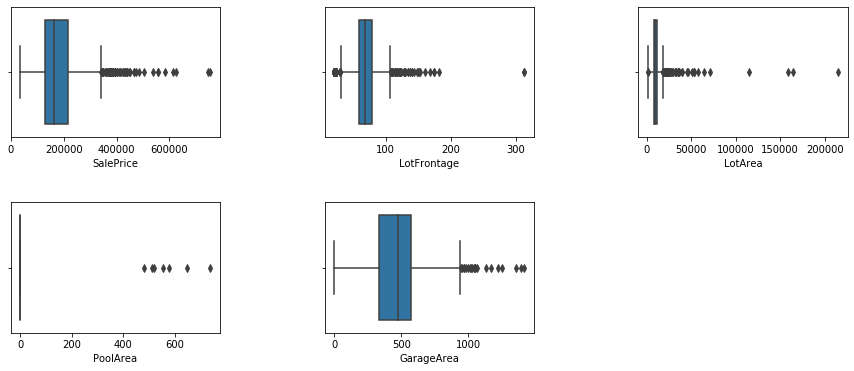

In [55]:
plt.figure(figsize=(15,6))

plt.subplot(2,3,1)
sns.boxplot(x='SalePrice', data=house)

plt.subplot(2,3,2)
sns.boxplot(x='LotFrontage', data=house)

plt.subplot(2,3,3)
sns.boxplot(x='LotArea', data=house)

plt.subplot(2,3,4)
sns.boxplot(x='PoolArea', data=house)

plt.subplot(2,3,5)
sns.boxplot(x='GarageArea', data=house)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

plt.show()

### We can see that there are some outliers present in LotArea, PoolArea, GarageArea variables. But removing these outliers may lead to loss of data.So, Lets not remove them.



### Lets perform some EDA on the data to get some insights from the data.

## EXPLORATORY DATA ANALYSIS:


### UNIVARIATE ANALYSIS:

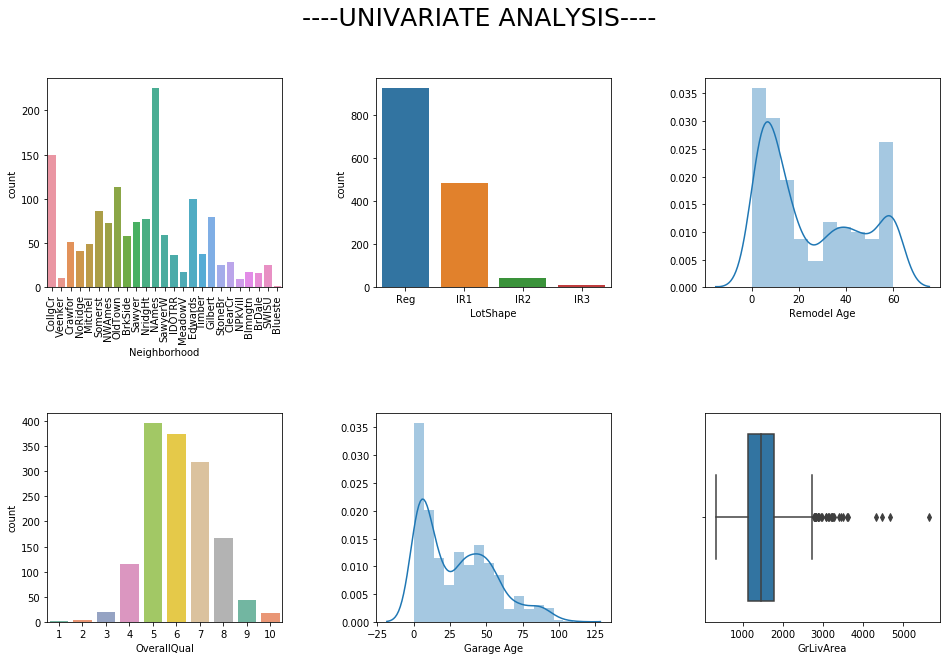

In [56]:

plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
plt.xticks(rotation = '90')
sns.countplot(x = 'Neighborhood',data = house) #countplot

plt.subplot(2,3,2)
sns.countplot(x = 'LotShape',data = house) #countplot

plt.subplot(2,3,3)
sns.distplot(house['Remodel Age']) #distplot

plt.subplot(2,3,4)
sns.countplot(x ='OverallQual',data = house,palette = 'Set2')  #countplot 

plt.subplot(2,3,5)
sns.distplot(house['Garage Age'])  #distplot

plt.subplot(2,3,6)
sns.boxplot(x = 'GrLivArea',data = house) #boxplot


plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(wspace = 0.4)

plt.suptitle('----UNIVARIATE ANALYSIS----',fontsize = 25)
plt.show()

### INSIGHTS:
    1. North Ames and College Creek locations are the Neighbourhoods for most of the properties.
    2. Most of the garages are built 20-25 years ago.
    3. The overall materials and finish of the house is above Average.
    4. The Ground Living area is between 500-3000 square feet approximately.
    5. Most of the properties have a Regular shape.



### BIVARIATE ANALYSIS: 

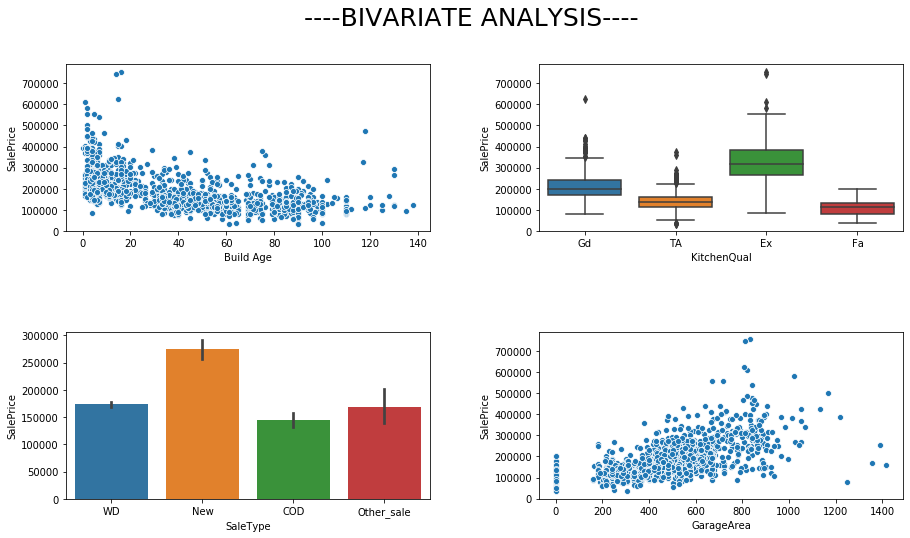

In [57]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.scatterplot(x ='Build Age',y ='SalePrice', data = house)  #scatterplot

plt.subplot(2,2,2)
sns.boxplot(x = 'KitchenQual',y = 'SalePrice',data = house) #boxplot

plt.subplot(2,2,3)
sns.barplot(x = 'SaleType',y = 'SalePrice',data = house) #barplot

plt.subplot(2,2,4)
sns.scatterplot(x = 'GarageArea',y = 'SalePrice',data = house) #scatterplot

plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(wspace = 0.3)
plt.suptitle('----BIVARIATE ANALYSIS----',fontsize = 25)
plt.show()

### INSIGHTS:
    1. There is no increase in the Saleprice with the increase in the age of the property when it was built.
    2. New properties have a high saleprice. Hence this feature can be make our model predict better scores.
    3. The Saleprice and Garage Area have a positive linear relation.
    4. Houses with Excellent Kitchen quality has high sale price.
    

#### Plotting some variables for Bivariate Analysis.

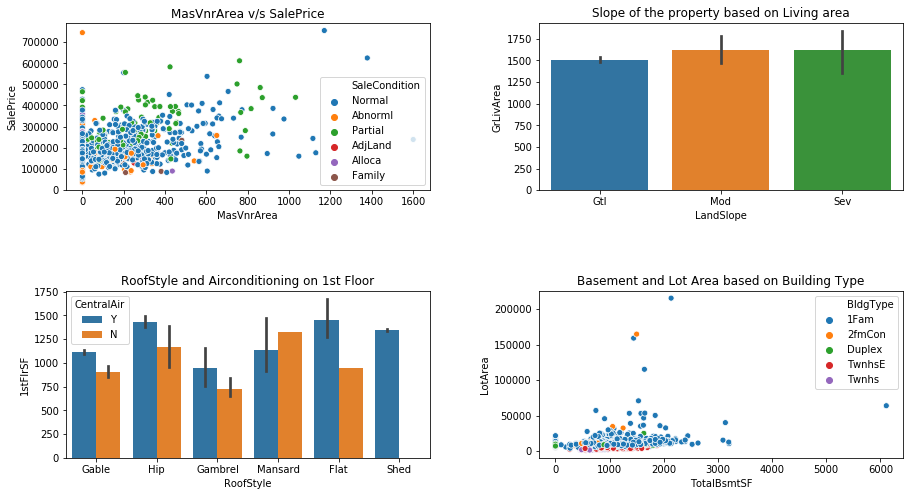

In [58]:
plt.figure(figsize=(15,8))

ax1=plt.subplot(2,2,1)
sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='SaleCondition',data=house)  #scaterrplot
ax1.title.set_text('MasVnrArea v/s SalePrice') #title


ax2=plt.subplot(2,2,2)
sns.barplot(x='LandSlope',y='GrLivArea',data=house) #barplot
ax2.title.set_text('Slope of the property based on Living area')

ax3=plt.subplot(2,2,3)
sns.barplot(x='RoofStyle',y='1stFlrSF',hue='CentralAir',data=house) #barplot
ax3.title.set_text('RoofStyle and Airconditioning on 1st Floor')

ax4=plt.subplot(2,2,4)
sns.scatterplot(x='TotalBsmtSF',y='LotArea',hue='BldgType',data=house) #scatterplot
ax4.title.set_text('Basement and Lot Area based on Building Type')


plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.3)
plt.show()

### INSIGHTS:
    1. The SalePrice increases with the increase in Massonry Veenr Area and the SaleCOndition is Normal.
    2. There is not a drastic difference in the slope of the property based on Ground Living Area.
    3. Flat and Hip roofs have Air conditioning available in them for 1st Floor. 
    4. The Basement and Lot Area is almost balanced for Single-Family.

### CORRELATION OF NUMERIC DATA:

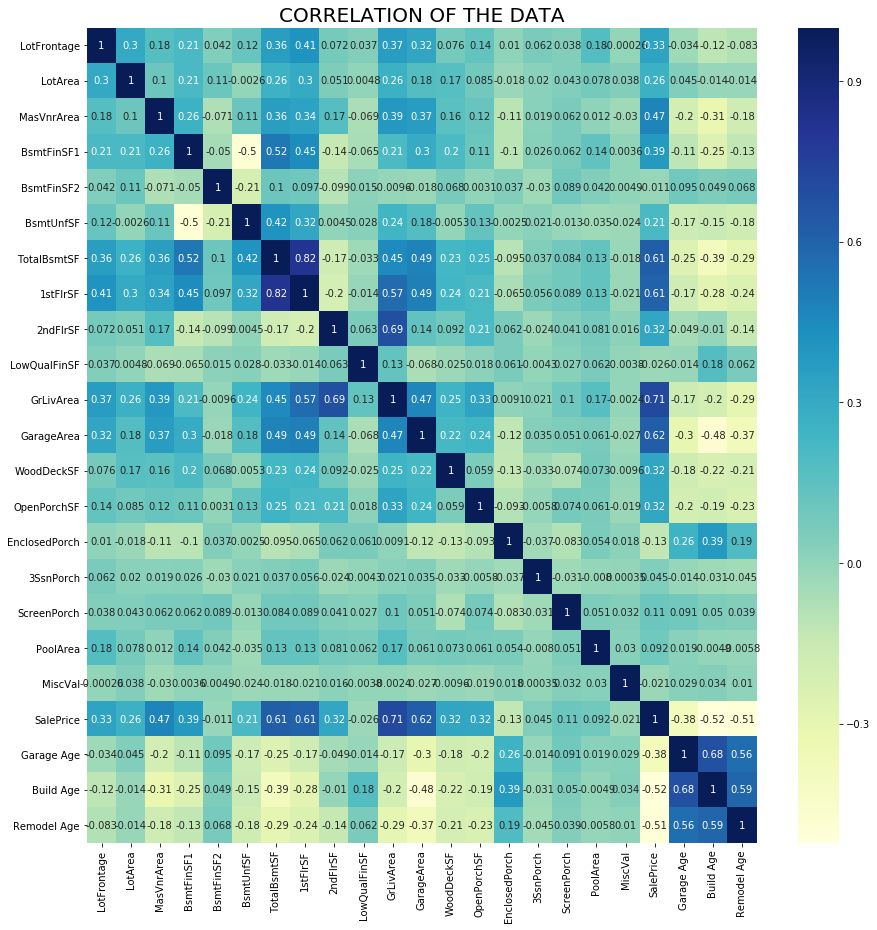

In [59]:
plt.figure(figsize=(15,15))

num_var = list(house.columns[house.dtypes != 'object'])

ax = sns.heatmap(house[num_var].corr(),annot=True, cmap="YlGnBu")

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('CORRELATION OF THE DATA', fontsize=20)

plt.subplots_adjust(hspace= 0.5)

### We can see that the highly correlated variables are:
    1. 1stFlrSF & TotalBsmtSF
    2. TotalBsmtSF & SalePrice
    3. GrLivArea & SalePrice
    4. GarageArea & Remodel Age
    5. Build Age & Garage Age
    6. Remodel Age & Build Age

### DISTRIBUTION OF TARGET VARIABLE:

Text(0.5, 1.0, 'Distribultion of Target Variable')

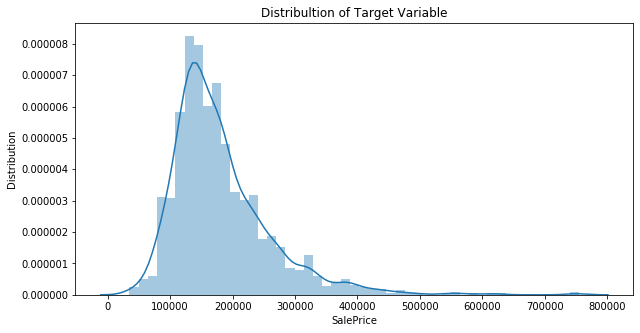

In [60]:
plt.figure(figsize=(10,5))

sns.distplot(house['SalePrice'])  #distplot

plt.ylabel('Distribution')
plt.title('Distribultion of Target Variable')

### We can see that the target variable 'SalePrice' is rightly skweked.  The distibution is not Normal. Hence we need to transform the Target variable in such a way that the target variable becomes Normally distributed. This will take care of Outliers as well as result in correct hypothesis testing.

### LOG - TRANSFORMATION OF TARGET VARIABLE (SALEPRICE)

Text(0.5, 1.0, 'Distribultion of Target Variable after Transformation')

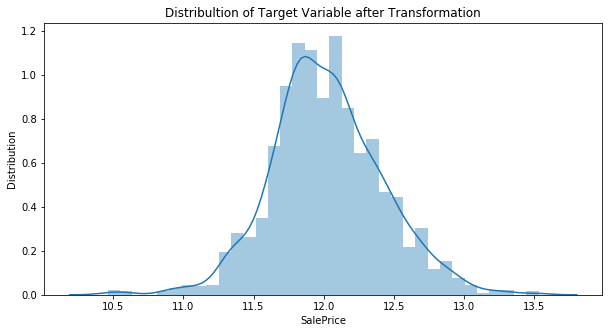

In [61]:
plt.figure(figsize=(10,5))

house['SalePrice']=np.log(house['SalePrice']) #log transformation

sns.distplot(house['SalePrice']) #distplot

plt.ylabel('Distribution')
plt.title('Distribultion of Target Variable after Transformation')


## DATA PREPARATION :

In [62]:
#CREATING A COPY OF THE CLEANED DATA FOR MODELLING.
mod = copy.deepcopy(house)
mod.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Garage Age,Sold Age,Build Age,Remodel Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,WD,Normal,12.247694,7.0,2,7,7
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,WD,Normal,12.109011,34.0,3,34,34
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,WD,Normal,12.317167,9.0,2,9,8
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,WD,Abnorml,11.849398,12.0,4,95,40
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,WD,Normal,12.429216,10.0,2,10,10


In [63]:
mod.shape #rows and columns of the data.

(1460, 75)

#### After cleaning the data, we are left with 75 features and the no. of rows are retained.

### DUMMY VARIABLE CREATION:

### Lets map the categories of 'Central Air' feature to 1 and 0:

In [64]:
var=['CentralAir']
def binary_map(x):
    return x.map({'Y': 1, "N": 0}) #mapping 'yes' to 1 and 'No' to 0.

mod[var] = mod[var].apply(binary_map) #applying the mapped variables.

In [65]:
#selecting only the categorical features for dummy creation.

cat_data = mod.select_dtypes([object])
cat_data.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,MoSold,SaleType,SaleCondition,Sold Age
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No Fence,2,WD,Normal,2
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Fence,5,WD,Normal,3
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Fence,9,WD,Normal,2
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No Fence,2,WD,Abnorml,4
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No Fence,12,WD,Normal,2


In [66]:
#creating dummy variables for all Categorical Columns:

dummy_df=pd.get_dummies(cat_data, drop_first=True)

dummy_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other_mat,RoofMatl_Tar&Grv,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Other_heating,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_Other_bed,KitchenAbvGr_Other_kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_Other_totrm,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Other_func,Functional_Typ,Fireplaces_1,Fireplaces_3,Fireplaces_Others,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_No Garage,GarageQual_TA,GarageCond_Fa,GarageCond_No Garage,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_New,SaleType_Other_sale,SaleType_WD,SaleCondition_AdjLand,SaleC

In [67]:
dummy_df.shape #rows and columns in dummy data

(1460, 255)

In [68]:
# dropping the original columns to reduce data redundancy.

cat_list = list(cat_data.columns)
mod = mod.drop(cat_list,axis = 1)


In [69]:
#Concating the original  data with the dummy data:

mod = pd.concat([mod,dummy_df],axis = 1)

mod.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Garage Age,Build Age,Remodel Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition2_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other_mat,RoofMatl_Tar&Grv,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Other_heating,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_Other_bed,KitchenAbvGr_Other_kitchen,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_Other_totrm,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Other_func,Functional_Typ,Fireplaces_1,Fireplaces_3,Fireplaces_Others,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_No Garage,GarageQual_TA,GarageCond_Fa,GarageCond_No Garage,Garage

In [70]:
#shape of the data after adding the dummy varaibles:
mod.shape

(1460, 279)

### So, after dummy variable creation we have total 279 features and 1460 rows

In [71]:
#Splitting the dependent and independent variables:

y = mod.pop('SalePrice')
X = mod

### SPLITTING THE DATA INTO TRAIN AND TEST :


In [72]:
#importing the train_test_split module from model_selection library.

from sklearn.model_selection import train_test_split

In [73]:
#Splitting the data in the ratio 70 : 30 :

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [74]:
#shape of Train data set:

X_train.shape

(1021, 278)

In [75]:
#shape of Test data set: 

X_test.shape

(439, 278)

### SCALING:

In [76]:
#Using Standardization for scaling the Train and Test datasets:

from sklearn.preprocessing import StandardScaler



In [77]:

#instantiating a scalar object:
scaler = StandardScaler()

#numeric columns:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Garage Age', 'Build Age','Remodel Age']

#fitting the Train data on the scaler object:
X_train[num_col] = scaler.fit_transform(X_train[num_col])


In [78]:
#Scaling the Test data set: 

X_test[num_col] = scaler.transform(X_test[num_col]) 

### FEATURE ELIMINATION USING RFE:

In [79]:
#Importing the RFE and Linear regression model from sklearn:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
#INSTANTIATING AN OBJECT OF LINEARREGRESSION CLASS:
lm = LinearRegression()

#FITTING THE MODEL:
lm.fit(X_train,y_train)

#ASSIGNING THE MODEL TO RFE 
rfe = RFE(lm, 50) # selecting 40 variables from RFE

rfe = rfe.fit(X_train, y_train) 

In [81]:
#All variables listed according to their rankings.

list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('LotFrontage', False, 226),
 ('LotArea', False, 171),
 ('MasVnrArea', False, 217),
 ('BsmtFinSF1', False, 159),
 ('BsmtFinSF2', False, 158),
 ('BsmtUnfSF', False, 160),
 ('TotalBsmtSF', False, 156),
 ('CentralAir', False, 161),
 ('1stFlrSF', False, 92),
 ('2ndFlrSF', False, 91),
 ('LowQualFinSF', False, 93),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 224),
 ('WoodDeckSF', False, 187),
 ('OpenPorchSF', False, 222),
 ('EnclosedPorch', False, 205),
 ('3SsnPorch', False, 198),
 ('ScreenPorch', False, 196),
 ('PoolArea', False, 210),
 ('MiscVal', False, 223),
 ('Garage Age', False, 219),
 ('Build Age', True, 1),
 ('Remodel Age', False, 133),
 ('MSSubClass_30', False, 8),
 ('MSSubClass_40', False, 79),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 112),
 ('MSSubClass_60', False, 37),
 ('MSSubClass_70', False, 113),
 ('MSSubClass_75', False, 81),
 ('MSSubClass_80', False, 120),
 ('MSSubClass_85', False, 136),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 106),
 ('MSS

In [82]:
#Considering only the variables selected by RFE for further modelling:

col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'Build Age', 'MSSubClass_45', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_Others', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'OverallQual_2', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Exterior2nd_BrkFace',
       'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'HeatingQC_Po',
       'BsmtFullBath_3', 'BedroomAbvGr_5', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_Other_totrm', 'Functional_Other_func', 'Fireplaces_1',
       'Fireplaces_3', 'Fireplaces_Others', 'FireplaceQu_Po',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageCars_1',
       'GarageCars

In [83]:
#Variables excluded by RFE:

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'Sold Age_1', 'Sold Age_2', 'Sold Age_3', 'Sold Age_4'],
      dtype='object', length=228)

In [84]:
#assigning the columns selected by RFE into X_train_new:

X_train_new = X_train[col]

In [85]:
#columns selected by RFE:

X_train_new.columns

Index(['GrLivArea', 'Build Age', 'MSSubClass_45', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_Others', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'OverallQual_2', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Exterior2nd_BrkFace',
       'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'HeatingQC_Po',
       'BsmtFullBath_3', 'BedroomAbvGr_5', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_Other_totrm', 'Functional_Other_func', 'Fireplaces_1',
       'Fireplaces_3', 'Fireplaces_Others', 'FireplaceQu_Po',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageCars_1',
       'GarageCars

### Using these features that RFE selected, lets create a model using both Ridge and Lasso Regression.

### LASSO REGRESSION:


In [86]:
#list of hyper-parameters for selecting the optimal hyper-parameter.

params = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,10,50,100,1000, 10000]}

In [87]:
#importing Ridge and Lasso model from Linear model of sklearn.
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#importing the GridsearchCV scheme for Cross validation.
from sklearn.model_selection import GridSearchCV

#importing metrics for calulating the scores.
from sklearn import metrics

In [88]:
# Applying Lasso Regression
lasso = Lasso()

# cross validation
folds = 5 #folds for crss validation
model_cv = GridSearchCV(estimator = lasso,  
                        param_grid = params, #hyper-parameters
                        scoring= 'neg_mean_absolute_error',  #scoring metric
                        cv = folds, 
                        return_train_score=True, # returning the Train Score 
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) #fitting the Cv model to data.

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
cv_results = pd.DataFrame(model_cv.cv_results_)  #creating a dataframe of the lasso model results.
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028116,0.006243,0.012498,0.006249,0.00001,{'alpha': 1e-05},-0.097004,-0.099299,-0.112836,-0.097961,-0.102273,-0.101875,0.005762,2,-0.094975,-0.091459,-0.091193,-0.094978,-0.094465,-0.093414,0.001717
1,0.024993,0.007650,0.003125,0.006250,0.00010,{'alpha': 0.0001},-0.096627,-0.099195,-0.112863,-0.097052,-0.101542,-0.101456,0.005966,1,-0.094988,-0.091652,-0.091362,-0.095059,-0.094555,-0.093523,0.001658
2,0.015629,0.000009,0.012498,0.006249,0.00100,{'alpha': 0.001},-0.096943,-0.104273,-0.116085,-0.098082,-0.099127,-0.102902,0.007052,3,-0.098961,-0.097049,-0.096032,-0.098052,-0.098940,-0.097807,0.001131
3,0.009375,0.007655,0.009370,0.007650,0.01000,{'alpha': 0.01},-0.131725,-0.151758,-0.149548,-0.139708,-0.145066,-0.143561,0.007214,4,-0.144075,-0.140508,-0.140016,-0.141151,-0.142529,-0.141656,0.001475
4,0.009375,0.007655,0.006249,0.007654,0.10000,{'alpha': 0.1},-0.176382,-0.183120,-0.183198,-0.183083,-0.197640,-0.184685,0.006986,5,-0.186958,-0.180395,-0.182258,-0.183551,-0.186738,-0.183980,0.002549


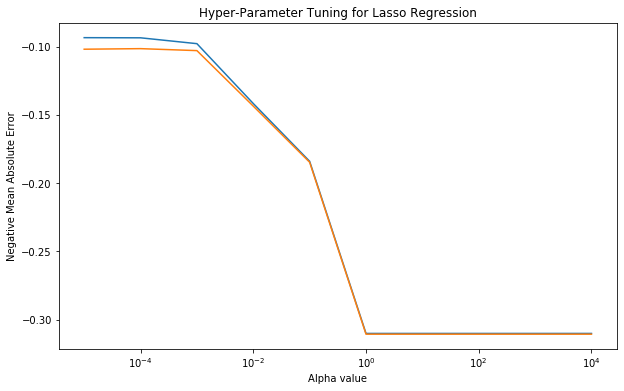

In [90]:
#plotting the Mean Train and Test scores.

plt.figure(figsize=(10,6))

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])

plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha value')

plt.title('Hyper-Parameter Tuning for Lasso Regression')


plt.show()

In [91]:
#From the above plots, we get the best score and best hyper parameter.
print("Best Hyper-parameter for Lasso:", model_cv.best_params_)
print("Best Score :",model_cv.best_score_)


Best Hyper-parameter for Lasso: {'alpha': 0.0001}
Best Score : -0.10145572108793663


In [92]:
#importing the r2 score and mean squared error from sklearn 

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [93]:
#assigning the Train data columns to Test data
X_test = X_test[X_train_new.columns]
X_test.columns

Index(['GrLivArea', 'Build Age', 'MSSubClass_45', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_Others', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'OverallQual_2', 'OverallQual_8', 'OverallQual_9',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'Exterior2nd_BrkFace',
       'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'HeatingQC_Po',
       'BsmtFullBath_3', 'BedroomAbvGr_5', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_Other_totrm', 'Functional_Other_func', 'Fireplaces_1',
       'Fireplaces_3', 'Fireplaces_Others', 'FireplaceQu_Po',
       'GarageType_No Garage', 'GarageFinish_No Garage', 'GarageCars_1',
       'GarageCars

In [94]:
lasso = Lasso(alpha=0.0001)  # applying alpha asper hyperparameter tuning.

lasso.fit(X_train_new,y_train) # fitting the data to Lasso.

y_train_pred = lasso.predict(X_train_new) # predictions on Train data

y_test_pred = lasso.predict(X_test) # prediction on Test data


print("R-Squared for Train -Lasso:",r2_score(y_true=y_train,y_pred=y_train_pred)) # R-square for Train data

print("R-Squared for Test - Lasso:",r2_score(y_true=y_test,y_pred=y_test_pred))  # R-square for Test data

R-Squared for Train : 0.891005280129682
R-Squared for Test : 0.8501804704144258


In [95]:
#Creating a Dataframe for the variables selected by Lasso.

lasso_df = pd.concat([pd.Series(X_train_new.columns), pd.Series(lasso.coef_)],axis = 1)
lasso_df.columns = ['Feature','Coeff']
lasso_list = lasso_df[lasso_df['Coeff']!=0].sort_values(by='Coeff',ascending = False)
print('No. of Non-zero Variable selected by Lasso:', len(lasso_list))

No. of Non-zero Variable selected by Lasso: 46


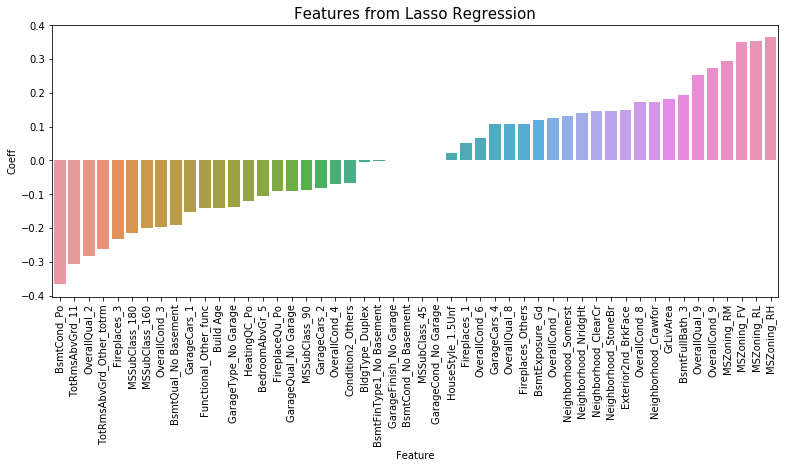

In [96]:
#plotting the features of Lasso Regression

plt.figure(figsize = (13,5))
lasso_df=lasso_df.sort_values(by='Coeff')
sns.barplot(x = 'Feature',y = 'Coeff',data = lasso_df)
plt.xticks(rotation = '90')

plt.title('Features from Lasso Regression', fontsize = 15)
plt.show()
 

In [97]:
#Calculating the RMSE value for Ridge Regression:
print ('RMSE for Lasso is: \n', mean_squared_error(y_test,y_test_pred))

RMSE for Lasso is: 
 0.024692472171559923


In [98]:
#selecting the top 15 variables from Lasso Regression:
lasso_list.head(15)

,Feature,Coeff
7,MSZoning_RH,0.364654
8,MSZoning_RL,0.353320
6,MSZoning_FV,0.351462
9,MSZoning_RM,0.293632
26,OverallCond_9,0.274713
20,OverallQual_9,0.252401
34,BsmtFullBath_3,0.193285
0,GrLivArea,0.183052
11,Neighborhood_Crawfor,0.172201
25,OverallCond_8,0.171875


#### The top features using lasso regression are:
    -Residences with high, medium and low density.Zoning areas with Village Residencies.
    -Excellent and Very good Condition of Houses.
    -Excellent material used in the Houses.
    -Neighbourhood locations: Crawford, Brick Face, Stone Brook, ClearCreek, NorthRidge Heights, Somerest.
    -Ground living area 


### RIDGE REGRESSION:

In [99]:
#Appying Ridge Regression.
ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, # Ridge Regression
                        param_grid = params, #hyper-parameters.
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True, 
                        verbose = 1)            

model_cv1.fit(X_train_new, y_train)  # fitting the data to the model.

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
#Creating a dataframe for the Ridge regression results.
cv_results_ridge = pd.DataFrame(model_cv1.cv_results_)
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('float32')
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009373,0.007653,0.006250,0.007655,0.00001,{'alpha': 1e-05},-0.097064,-0.099320,-0.112827,-0.098069,-0.102338,-0.101924,0.005733,6,-0.094977,-0.091465,-0.091181,-0.094972,-0.094460,-0.093411,0.001717
1,0.009375,0.007655,0.003125,0.006249,0.00010,{'alpha': 0.0001},-0.097063,-0.099320,-0.112827,-0.098068,-0.102338,-0.101923,0.005733,5,-0.094977,-0.091465,-0.091181,-0.094972,-0.094460,-0.093411,0.001717
2,0.012499,0.006249,0.003126,0.006252,0.00100,{'alpha': 0.001},-0.097061,-0.099319,-0.112828,-0.098064,-0.102334,-0.101921,0.005734,4,-0.094978,-0.091465,-0.091181,-0.094972,-0.094461,-0.093411,0.001718
3,0.012499,0.006249,0.012499,0.006249,0.01000,{'alpha': 0.01},-0.097034,-0.099309,-0.112838,-0.098023,-0.102295,-0.101900,0.005748,3,-0.094982,-0.091471,-0.091182,-0.094975,-0.094466,-0.093415,0.001718
4,0.009376,0.007655,0.003125,0.006250,0.10000,{'alpha': 0.1},-0.096819,-0.099215,-0.112945,-0.097634,-0.101928,-0.101708,0.005883,2,-0.095017,-0.091521,-0.091185,-0.094998,-0.094517,-0.093448,0.001723
5,0.003125,0.006249,0.006250,0.007655,1.00000,{'alpha': 1},-0.095607,-0.098847,-0.112907,-0.096543,-0.099472,-0.100675,0.006280,1,-0.095360,-0.092113,-0.091622,-0.095150,-0.094877,-0.093825,0.001613
6,0.000000,0.000000,0.012500,0.006250,10.00000,{'alpha': 10},-0.096975,-0.102195,-0.113374,-0.098688,-0.098886,-0.102024,0.005922,7,-0.098943,-0.096583,-0.095645,-0.098153,-0.099048,-0.097674,0.001344
7,0.009378,0.007657,0.000000,0.000000,50.00000,{'alpha': 50},-0.108621,-0.119939,-0.121655,-0.110512,-0.111535,-0.114453,0.005292,8,-0.112804,-0.110268,-0.110197,-0.111783,-0.114070,-0.111825,0.001488
8,0.009375,0.007654,0.000000,0.000000,100.00000,{'alpha': 100},-0.117637,-0.130108,-0.129442,-0.118653,-0.123697,-0.123907,0.005216,9,-0.123100,-0.119727,-0.120329,-0.122602,-0.124241,-0.122000,0.001706
9,0.007148,0.001576,0.004800,0.001599,1000.00000,{'alpha': 1000},-0.182810,-0.189939,-0.186048,-0.179889,-0.200439,-0.187825,0.007140,10,-0.188397,-0.185173,-0.186700,-0.188004,-0.187592,-0.187173,0.001148


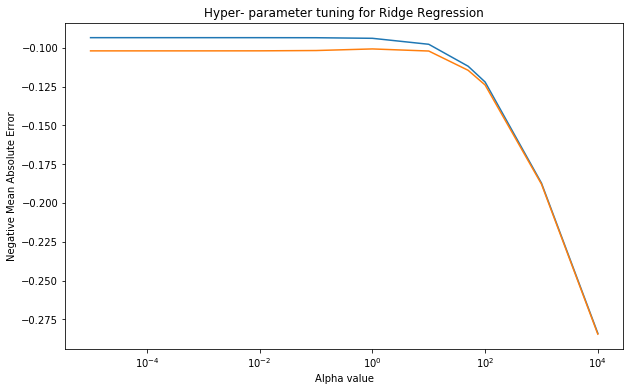

In [101]:
#Plotting the Mean Train and Test score for hyper-parameter tuning.

plt.figure(figsize=(10,6))

plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'],cv_results_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha value')

plt.title('Hyper- parameter tuning for Ridge Regression')

plt.show()


In [102]:
#Calulating the best hyper parameter and score from the Ridge Regression:
print("Best Hyper-parameter for Ridge:",model_cv1.best_params_)
print("Best Score for Lasso:",model_cv1.best_score_)


Best Hyper-parameter for Ridge: {'alpha': 1}
Best Score for Lasso: -0.10067487970777282


In [103]:
ridge = Ridge(alpha=1)  # applying alpha asper hyperparameter tuning.

ridge.fit(X_train_new,y_train) # fitting the data to Lasso.

y_train_pred_ridge = ridge.predict(X_train_new) # predictions on Train data

y_test_pred_ridge = ridge.predict(X_test) # prediction on Test data


print("R-Squared for Train -Ridge :",r2_score(y_true=y_train,y_pred=y_train_pred_ridge)) # R-square for Train data

print("R-Squared for Test -Ridge  :",r2_score(y_true=y_test,y_pred=y_test_pred_ridge))  # R-square for Test data

R-Squared for Train : 0.8895444734853901
R-Squared for Test : 0.8521492592144719


In [104]:
#Coefficients selected by Ridge:
ridge.coef_

array([ 0.1821526 , -0.14173247, -0.01979717, -0.04443784, -0.19510773,
       -0.19654224,  0.25449368,  0.26831888,  0.26857683,  0.20894024,
        0.14246241,  0.17017638,  0.13905558,  0.13937369,  0.14137591,
       -0.07781778, -0.04443784,  0.04584694, -0.25061636,  0.10789553,
        0.24272119, -0.19612196, -0.07106224,  0.06600414,  0.12535763,
        0.17303803,  0.26031997,  0.14717584, -0.06448159, -0.06448159,
       -0.2300705 ,  0.11807927, -0.06448159, -0.11187944,  0.14991788,
       -0.10666211, -0.28074885, -0.24011889, -0.13178933,  0.05265531,
       -0.20955764,  0.11198653, -0.09097635, -0.05835703, -0.05835703,
       -0.15479661, -0.08336274,  0.10261532, -0.05835703, -0.05835703])

In [105]:
#Creating a dataframe for coeffcients of Ridge Regression:

ridge_df=pd.concat([pd.Series(X_train_new.columns), pd.Series(ridge.coef_)],axis=1)

ridge_df.columns=['Feature','Coeff']  # renaming the columns

ridge_list=ridge_df[ridge_df['Coeff']!=0].sort_values(by='Coeff',ascending=False) #selecting the non-zero coefficients.

print('No. of Variables selected by Ridge:', len(ridge_list))

No. of Variables selected by Ridge: 50


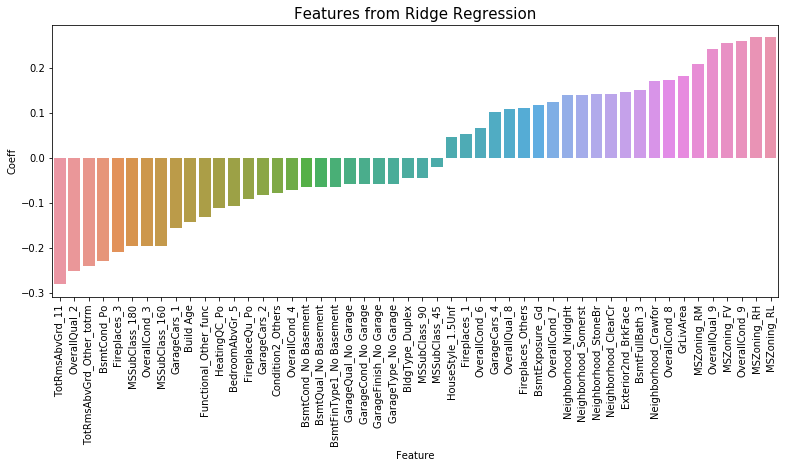

In [106]:
#plotting the features of Ridge Regression

plt.figure(figsize = (13,5))

ridge_df=ridge_df.sort_values(by='Coeff')
sns.barplot(x = 'Feature',y = 'Coeff',data=ridge_df) # barplot
plt.xticks(rotation ='90')
plt.title('Features from Ridge Regression', fontsize = 15)
plt.show()
 

In [107]:
#Calculating the RMSE value for Ridge Regression:
print ('RMSE for Ridge is: \n', mean_squared_error(y_test,y_test_pred_ridge))

RMSE for Ridge is: 
 0.02436798668698194


In [108]:
#Selecting the Top 15 Features from Ridge regression.
ridge_list.head(15)

,Feature,Coeff
8,MSZoning_RL,0.268577
7,MSZoning_RH,0.268319
26,OverallCond_9,0.260320
6,MSZoning_FV,0.254494
20,OverallQual_9,0.242721
9,MSZoning_RM,0.208940
0,GrLivArea,0.182153
25,OverallCond_8,0.173038
11,Neighborhood_Crawfor,0.170176
34,BsmtFullBath_3,0.149918


### We can see that according to Lasso  and Ridge Regression, the top features are similar for both regression and are mentioned above.
### INFERENCES:
    1. The Zoning areas are mostly Residentials with high, medium and low density and Village Residences. We can conclude that to get higher sales prices, we need to focus on this areas for Sales.
    2. Look for houses with Excellent and'Very good' material and finishing for high rates.
    3. Houses with full Bathrooms in the basement will increase the Sale prices.
    4. Properties with exterior covering of Brick Face will effect the increase in the house rates.
    5. Look for properties close to these locations: Crawford, StoneBrook,Clear Creek, NorthRidge heights,Somerest.
    6. Consider houses with more ground living area. 

### The R-squared value for both Ridge and Lasso are upto the mark.(more than 80% for both Train and Test)
### Also the RMSE score is low for both the regression, hence we can say that it is a better model for predicting the Sale Prices.


## This model will can be used by the management to understand how exactly the prices vary with these variables. They can accordingly manipulate the strategy of the firm and concentrate on these above features that may yield high returns.